### Kuvan lukeminen ja tulostamien

Huomaa, että kuvan origo on vasemmassa yläkulmassa!
- otetaan käyttöön Kirjastot numpy ja cv2

2048 2048


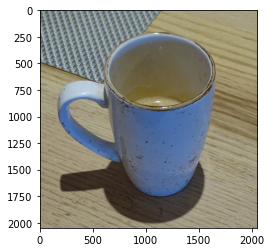

In [1]:
# Kuvan lukeminen ja piirto
import numpy as np
import cv2
import matplotlib.pyplot as plt


img = plt.imread('kuppi_2048.png')


height, width, channels = img.shape
print(height, width)

plt.imshow(img)



### Valmiiden kirjastojen käyttö valokuvan kierrossa keskipisteen suhteen

- getRotationMatrix2D funktion käyttöä
- Huomaa, että Opencv:ssä kiertomatriisi M on 2x3 matriisi

2048
2048
[[ 7.07106781e-01 -7.07106781e-01  1.02400000e+03]
 [ 7.07106781e-01  7.07106781e-01 -4.24154688e+02]]


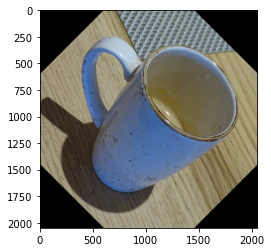

In [2]:
#Opencv warpAffine ja getRotationMatrix2D funktioiden käyttö kuvan kierrossa kuvan keskipisteen suhteen
# valitse kulma
angle = -45
print(height)
print(width)

#Muunnosmatriisin M laskeminen, kierto keskipisteen suhteen
M = cv2.getRotationMatrix2D((height/2,width/2),angle,1)
print(M)
#Suoritetaan affiinimuunnos kuvalle img matriisilla M, muunnetun kuvan leveys ja korkeus parametreina
result_img = cv2.warpAffine(img, M, (width, height))

# Kuvan piirto
plt.imshow(result_img)

### 2D Siirto eli translaatio T

3x3 Siirtomatriisi matematiikassa
$$
T=\left[\begin{matrix}
1&0&t_x\\
0&1&t_y\\
0&0&1
\end{matrix}\right]
$$

1/4-siirtomatriisin toteutus OpencV 2x3 matriisina T:

$$
T=\left[\begin{matrix}
1&0&x/4\\
0&1&y/4
\end{matrix}\right]
$$

missä x= width = kuvan leveys ja y = height eli kuvan korkeus

[[  1.   0. 512.]
 [  0.   1. 512.]]


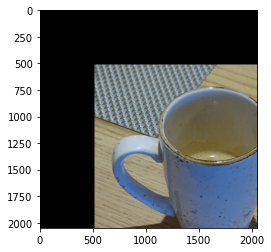

In [4]:
# Kuvan 3x2-siirtomatriisi T , 1/4 siirto
T = np.float32(np.array([[1, 0, width/4],[0, 1, height/4]]))
print(T)


#Affiinimuunnos eli suoritetaan kuvan siirto
result_img = cv2.warpAffine(img, T, (height ,width))

plt.imshow(result_img)

## 2D Affiinimuunnos = Translaatio + Lineearinen muunnos 
### 1/4-siirto eli translaatio T ja 0.5-skaalaus S matematiikassa

3x3 Siirtomatriisi ja skaalausmatriisi matematiikassa
$$
T=\left[\begin{matrix}
1&0&t_x\\
0&1&t_y\\
0&0&1
\end{matrix}\right] 
$$
ja
$$
S=\left[\begin{matrix}
s&0&0\\
0&s&0\\
0&0&1
\end{matrix}\right]
$$
eli T ja S molemmat yhdessä:
$$
M=\left[\begin{matrix}
s&0&t_x\\
0&s&t_y\\
0&0&1
\end{matrix}\right] 
$$

### 1/4-siirtomatriisin  ja skaalausmatriisin (s=0.5) toteutus OpencV 2x3 matriisina M:

$$
M=\left[\begin{matrix}
0.5&0&x/4\\
0&0.5&y/4
\end{matrix}\right]
$$

missä x= width = kuvan leveys ja y = height eli kuvan korkeus

[[5.00e-01 0.00e+00 5.12e+02]
 [0.00e+00 5.00e-01 5.12e+02]]


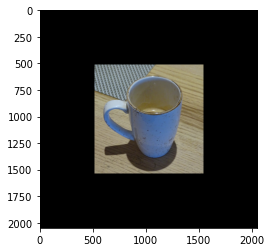

In [5]:
# Kuva skaalaus ja siirto 
#Skaalauskerroin
scale = 0.5

# Kuvan skaalaus ja 3x2-siirtomatriisi
T = np.float32(np.array([[scale, 0, width/4],[0, scale, height/4]]))


print(T)

#Suoritetaan Affiinimuunnos T
result_img = cv2.warpAffine(img, T, (height ,width))

plt.imshow(result_img)

## 2D Affiinimuunnos = Translaatio + Lineearinen muunnos ja kierto 
###  0.5-skaalaus S sekä kierto sekä translaatio matematiikassa

Muodostetaan Affiinimuunnoksen matriisi, jossa kaksi ensimmäistä pystysaraketta ovat skaalaus ja kierto alkuperäisen origon ympyäri. 

5.551115123125783e-17 0.7071067811865475


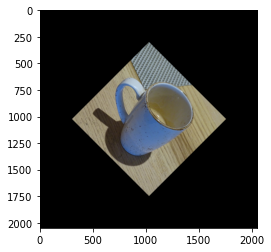

In [74]:
angle = 45*np.pi/180
scale = 0.5
a = scale*np.cos(angle)
b = scale*np.sin(angle)

print(a-b, a+b)

T = np.float32(np.array([[a, -b, width/2*(1-(a-b))],
                         [b,  a, height/2*(1-(a+b))]]))
result_img = cv2.warpAffine(img, T, (height ,width))

plt.imshow(result_img)

## 2D Affiinimuunnos = Translaatio + Lineearinen muunnos ja kierto 
### 1/4-siirto eli translaatio T ja 0.5-skaalaus S sekä kierto  matematiikassa

3x3 Siirtomatriisi ja skaalausmatriisi matematiikassa
$$
T=\left[\begin{matrix}
1&0&t_x\\
0&1&t_y\\
0&0&1
\end{matrix}\right] 
$$
ja
$$
S=\left[\begin{matrix}
s&0&0\\
0&s&0\\
0&0&1
\end{matrix}\right]
$$
kierto
$$
R=\left[\begin{matrix}
\cos\left(\alpha\right)&-\sin\left(\alpha\right)&0\\
\sin\left(\alpha\right)&\cos\left(\alpha\right)&0\\
0&0&1
\end{matrix}\right]
$$

eli T ja S molemmat yhdessä:
$$
M=\left[\begin{matrix}
s&0&t_x\\
0&s&t_y\\
0&0&1
\end{matrix}\right] 
$$

### 1/4-siirtomatriisin , skaalausmatriisin (s=0.5)  kierron R toteutus OpencV 2x3 matriisina M:

Kuvaa tähän vaiheet 1 - 4:!

In [ ]:
angle = 45
scale = 0.5

# Alkuperäisen kuvan keskipiste
center = (width//2, height //2) 
#Kiertomatriisi R
R = cv2.getRotationMatrix2D(center, angle, 1)*scale
print(R)

new_img = cv2.warpAffine(img, R, (width, height))

original_image_corners = [(0, 0, 1), (width, 0, 1), (0, height, 1), (width, height, 1)]
#matmul eli tulo
new_image_corners = [np.matmul(rotation_matrix, coordinate) for coordinate in original_image_corners]

min_x = np.min([coordinate[0] for coordinate in new_image_corners])
max_x = np.max([coordinate[0] for coordinate in new_image_corners])

min_y = np.min([coordinate[1] for coordinate in new_image_corners])
max_y = np.max([coordinate[1] for coordinate in new_image_corners])

new_dimensions = (int(max_y-min_y), int(max_x-min_x))
print("uudet mitat: ", new_dimensions)

new_center = (new_dimensions[0] //2, new_dimensions[1] //2)
center_translation = (new_center[0] - center[0], new_center[1] - center[1])

R[0][2] += center_translation[0]
R[1][2] += center_translation[1]

result_img = cv2.warpAffine(new_img, R, new_dimensions)
plt.imshow(result_img)
